In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

filename = "dog_rates_tweets.csv"
dataframe1 = pd.read_table(filename, sep=',' ,index_col=0, parse_dates=[1])

In [19]:
# Generate column for rating
dataframe1['rate'] = dataframe1['text'].str.extract(r'(\d+(\.\d+)?)/10', expand=False)[0]

# Generate column indicate if data has a rating
dataframe1['hasRate'] = dataframe1['rate'].notnull()

# Drop all non-rating records
dataframe1 = dataframe1[dataframe1['hasRate']==True]

# Convert rate from string to float
dataframe1['rate'] = dataframe1['rate'].apply(lambda x: float(x))

# Drop all outliers (rate > 20)
dataframe1 = dataframe1[dataframe1['rate']<=20]

# Generate timestamp column
dataframe1['timestamp'] = dataframe1['created_at'].apply(lambda x: x.timestamp())

In [20]:
fit = stats.linregress(dataframe1['timestamp'], dataframe1['rate'])
dataframe1['fit_y'] = dataframe1['timestamp']*fit.slope + fit.intercept

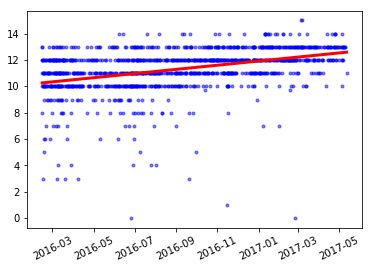

In [23]:
plt.xticks(rotation=25)
plt.plot(dataframe1["created_at"] ,dataframe1["rate"], 'b.', alpha=0.5)
plt.plot(dataframe1["created_at"] ,dataframe1["fit_y"], 'r-',linewidth=3)
plt.show()